## Observations and Insights 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_combine= pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
mouse_study_combine.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
mouse_study_combine["Mouse ID"].count()

1893

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_duplicate= mouse_study_combine[mouse_study_combine.duplicated(subset=('Mouse ID','Timepoint' ), keep ='first')]
mouse_study_duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
print(mouse_study_duplicate.index)


Int64Index([909, 911, 913, 915, 917], dtype='int64')


In [60]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_study_drop= mouse_study_combine.drop([909, 911, 913, 915, 917])
mouse_study_drop

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [61]:
# Checking the number of mice in the clean DataFrame.

mouse_study_drop['Mouse ID'].count()

1888

## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary= mouse_study_combine.groupby('Drug Regimen').agg(\
        # Mean
        mean_tumor=('Tumor Volume (mm3)', np.mean),\
        # Median
        median_tumor=('Tumor Volume (mm3)', np.median),\
        # Variance
        variance_tumor=('Tumor Volume (mm3)', np.var),\
        # Standard Deviation 
        stdev_tumor=('Tumor Volume (mm3)', np.std),\
        # Standard of Err
        sem_tumor=('Tumor Volume (mm3)', st.sem)\
).round(2)


summary


C:\Users\Prateek\anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Prateek\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\Prateek\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean_tumor,median_tumor,variance_tumor,stdev_tumor,sem_tumor
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

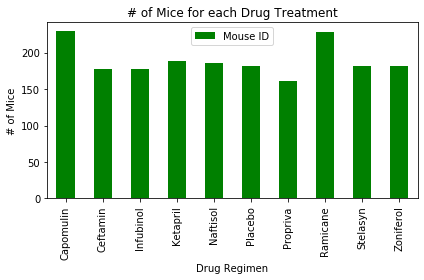

In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

treatment_group= mouse_study_combine.groupby ('Drug Regimen')

mouse_treatment = pd.DataFrame (treatment_group['Mouse ID'].count())

bar_chart = mouse_treatment.plot(kind='bar', title="# of Mice for each Drug Treatment", color="green")

bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("# of Mice")
plt.tight_layout ()
plt.show()

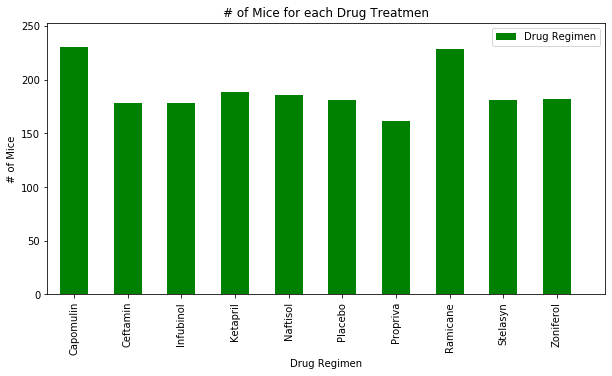

In [45]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Using the same groupby dataframe as above
# Set x axis and tick locations
x_axis = np.arange(len(mouse_treatment))
tick_locations = [value for value in x_axis]


plt.figure(figsize=(10,5))
plt.bar(x_axis, mouse_treatment["Drug Regimen"], color='green', align="center", width = 0.52)
plt.xticks(tick_locations, list(mouse_treatment.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.5, len(x_axis)-0.1)
plt.ylim(0, max(mouse_treatment["Drug Regimen"])*1.10)

# Set a Title and labels
plt.title("# of Mice for each Drug Treatmen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")


plt.show()


In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Creating a dataframe grouping by the 'Sex' column
male_female = mouse_study_combine.groupby('Sex')

# Create a dataframe counting the number of data points for each gender
male_female_count = pd.DataFrame(male_female['Sex'].count())

# View the groupby dataframe
male_female_count.head()

,Sex
Sex,
Female,935
Male,958


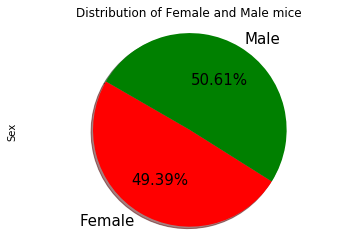

In [61]:
male_female_count.plot(kind='pie', y='Sex', \
                        title="Distribution of Female and Male mice",startangle=150,\
                        autopct='%4.2f%%',shadow=True, fontsize=15, colors =["red","green"],legend =False)
# Creating Equal sections for the Pie Chart
plt.axis("equal")

plt.show()

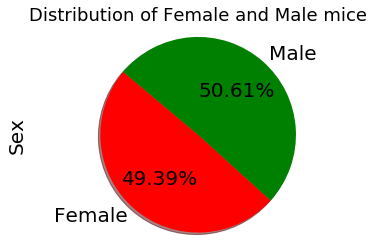

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = list(male_female_count.index.values)

# The values of each section of the pie chart
gender_counts = male_female_count['Sex']

# The colors of each section of the pie chart
colors = ["red", "green"]

# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 15

plt.title("Distribution of Female and Male mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

list_drug = mouse_study_drop.loc[(mouse_study_drop['Drug Regimen']=='Capomulin') |
                            (mouse_study_drop['Drug Regimen']=='Ramicane') |
                            (mouse_study_drop['Drug Regimen']=='Infubinol') |
                           (mouse_study_drop['Drug Regimen']=='Ceftamin')]
drug_45 = list_drug.loc[list_drug['Timepoint']==45]
tumor_volume = drug_45['Tumor Volume (mm3)']
quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
lq = quartiles[0.25]
uq = quartiles[0.75]
iqr = uq - lq
lower_boundary = lq - iqr*1.5
upper_boundary = uq + iqr*1.5
print(lq)
print(uq)
print(iqr)
print(lower_boundary)
print(upper_boundary)
belowlower = []
rcount = 0
l1 = tumor_volume.tolist()
rcount = 0
l2 = []
for i in l1:
    if l1[rcount] < lower_boundary:
        l2.append(l1[rcount])
        rcount += 1
    if rcount == len(l1):
        rcount == 0
        break
print(f"The number of tumor sizes below lower boundary are : {len(l2)}")
l3 = []
for i in l1:
    if l1[rcount] > upper_boundary:
        l3.append(l1[rcount])
        rcount += 1
    if rcount == len(l1):
        break
print(f"The number of tumor sizes above upper boundary are : {len(l3)}")


if (len(l3) == 0) & (len(l2) == 0):
    print("There are no potential outliers.")
else:
    print("There are potential outliers.")


33.48002734
62.14221369
28.66218635
-9.513252184999999
105.135493215
The number of tumor sizes below lower boundary are : 0
The number of tumor sizes above upper boundary are : 0
There are no potential outliers.


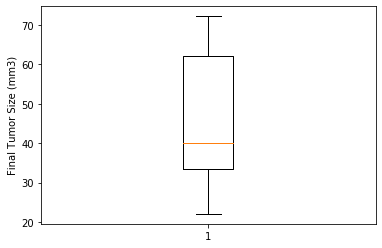

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1 , ax1 = plt.subplots()
ax1.boxplot(tumor_volume)
ax1.set_ylabel("Final Tumor Size (mm3)")
plt.show()


## Line and Scatter Plots

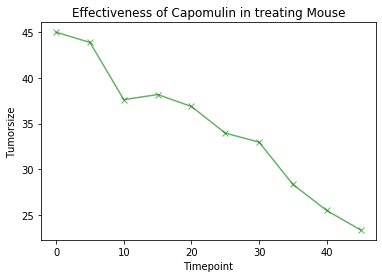

In [62]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Capomulin = mouse_study_drop.loc[mouse_study_drop['Drug Regimen']=='Capomulin']
capomulin_mouseID = Capomulin.loc[Capomulin['Mouse ID'] == 's185']
x_axis = capomulin_mouseID['Timepoint'].tolist()
y_axis = capomulin_mouseID['Tumor Volume (mm3)'].tolist()

plt.plot(x_axis, y_axis, marker='x', color='green', alpha=0.60)
plt.ylabel('Tumorsize')
plt.xlabel('Timepoint')
plt.title('Effectiveness of Capomulin in treating Mouse')

plt.show()


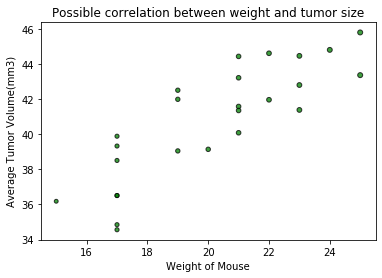

In [40]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin = mouse_study_drop.loc[mouse_study_drop['Drug Regimen']=='Capomulin']
capomulin_mouse= capomulin.groupby(['Mouse ID'])
x_axis = capomulin_mouse['Weight (g)'].mean()
y_axis = capomulin_mouse['Tumor Volume (mm3)'].mean()
plt.scatter(x_axis, y_axis, marker ='o', facecolors='green', edgecolors='black', s=x_axis, alpha=0.75)
plt.ylabel('Average Tumor Volume(mm3)')
plt.xlabel('Weight of Mouse')
plt.title('Possible correlation between weight and tumor size')
plt.show()

## Correlation and Regression

The correlation coefficient of weight and average tumor volume is : 0.84


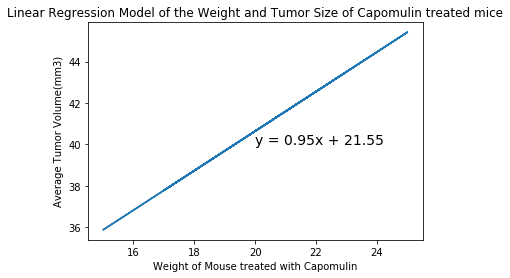

In [44]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_axis, y_axis)
print(f"The correlation coefficient of weight and average tumor volume is : {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderror) = st.linregress(x_axis, y_axis)
linearregress = x_axis * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(equation)
plt.plot(x_axis, linearregress)
plt.annotate(equation, (20, 40), fontsize=14)
plt.ylabel('Average Tumor Volume(mm3)')
plt.xlabel('Weight of Mouse treated with Capomulin')
plt.title('Linear Regression Model of the Weight and Tumor Size of Capomulin treated mice')
plt.show()